<a href="https://colab.research.google.com/github/VictorRevers/SVD/blob/main/aps2SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

processing...
compressing...
dimensões do canal r: (683, 683)
arranging...


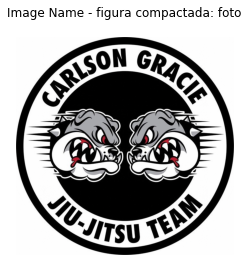

Valor de K: 409
processing...
compressing...
dimensões do canal r: (683, 683)
arranging...


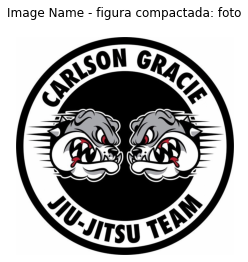

Valor de K: 478
processing...
compressing...
dimensões do canal r: (683, 683)
arranging...


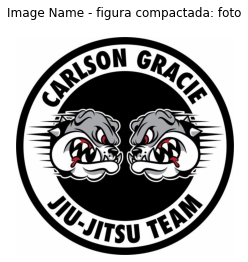

Valor de K: 546


In [77]:
#APS 2 METODOS NUMÉRICOS COMPUTACIONAIS - TURMA 145R
#PROFESSOR: Sérgio Assunção Monteiro
#Aluno: Victor Revers Kasnowski - Matricula: 2020101175


import numpy as np
import matplotlib.pyplot as plt
import cv2
from numpy.linalg import svd
from PIL import Image
import os
from skimage import io
from google.colab.patches import cv2_imshow

def compress_image(img_name, img, k):
    print("processing...")

    # splitting the array into three 2D array (svd only apply on 2D array)
    #transformando a imagem em 3 arrays que formam uma matriz.
    r = img[:, :, 0]  # array for R
    g = img[:, :, 1]  # array for G
    b = img[:, :, 2]  # array for B

    print("compressing...")

    # Calculating the svd components for all three arrays
    #Decomposição por valores singulares
    ur, sr, vr = svd(r, full_matrices=False)
    ug, sg, vg = svd(g, full_matrices=False)
    ub, sb, vb = svd(b, full_matrices=False)

    print('dimensões do canal r: {}'.format(r.shape))

    # Forming the compress image with reduced information
    # We are selecting only k singular values for each array to make image which will exclude some information from the
    # image while image will be of same dimension

    # ur (mxk), diag(sr) (kxk) and vr (kxn) if image is off (mxn)
    # so let suppose we only selecting the k1 singular value from diag(sr) to form image

    rr = np.dot(ur[:, :k], np.dot(np.diag(sr[:k]), vr[:k, :]))
    rg = np.dot(ug[:, :k], np.dot(np.diag(sg[:k]), vg[:k, :]))
    rb = np.dot(ub[:, :k], np.dot(np.diag(sb[:k]), vb[:k, :]))

    print("arranging...")

    # Creating a array of zeroes; shape will be same as of image matrix
    rimg = np.zeros(img.shape)

    # Adding matrix for R, G & B in created array
    rimg[:, :, 0] = rr
    rimg[:, :, 1] = rg
    rimg[:, :, 2] = rb

    # It will check if any value will be less than 0 will be converted to its absolute
    # and, if any value is greater than 255 than it will be converted to 255
    # because in image array of unit8 can only have value between 0 & 255
    for ind1, row in enumerate(rimg):
        for ind2, col in enumerate(row):
            for ind3, value in enumerate(col):
                if value < 0:
                    rimg[ind1, ind2, ind3] = abs(value)
                if value > 255:
                    rimg[ind1, ind2, ind3] = 255

    # converting the compress image array to uint8 type for further conversion into image object
    compressed_image = rimg.astype(np.uint8)

    # Showing the compressed image in graph
    plt.title("Image Name - figura compactada: " + img_name + "\n")
    plt.imshow(compressed_image)
    plt.axis('off')
    plt.show()
    cv2.imwrite("Imagem/comp-" + str(img_name) + ".jpg", compressed_image)

    # Uncomment below code if you want to save your compressed image to the file
    # compressed_image = Image.fromarray(compressed_image)
    # compressed_image.save("image_name.jpg")

origem = "https://dnd1g0gk41u1l.cloudfront.net/image/partners/482296/x_lg_e7032d9b-b272-4443-a201-77dcaa38b961_cfaebfbeeedbabBFAFBABFADDCDC.jpeg"
image = io.imread(origem) 
img = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) 
x, _ = img.shape #pegando tamanho da imagem para multiplica-lo por k e comprimi-la
k=[int((0.6 * x )), int((0.7 * x )), int((0.8 * x))] #array de operações para determinar os valores de k
for i in range(len(k)): #looping para comprimir as imagens a partir dos valores de k
 compress_image("foto", image, k[i])
 print(f'Valor de K: {k[i]}')
